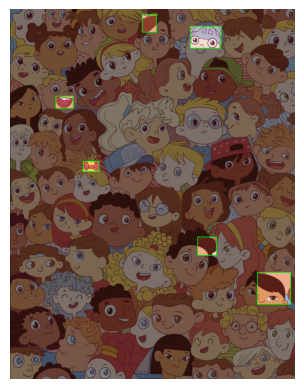

True

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

img = cv2.imread("image.png")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

darkened_img = cv2.convertScaleAbs(img, alpha=0.5, beta=0)  

template_dir = "items"
templates = [os.path.join(template_dir, f) for f in os.listdir(template_dir) if f.endswith('.png')]

threshold = 0.6

for template_path in templates:
    template = cv2.imread(template_path, 0) 
    best_match_val = -1
    best_match_loc = None
    best_match_scale = None
    best_w, best_h = None, None

    for scale in np.linspace(0.5, 1.5, 20):
        scaled_template = cv2.resize(template, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
        w, h = scaled_template.shape[::-1] 

        res = cv2.matchTemplate(img_gray, scaled_template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        if max_val > best_match_val:
            best_match_val = max_val
            best_match_loc = max_loc
            best_match_scale = scale
            best_w, best_h = w, h

    if best_match_val >= threshold:
        top_left = best_match_loc
        bottom_right = (top_left[0] + best_w, top_left[1] + best_h)

        roi = img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
        darkened_img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = roi

        cv2.rectangle(darkened_img, top_left, bottom_right, (0, 255, 0), 2)

darkened_img_rgb = cv2.cvtColor(darkened_img, cv2.COLOR_BGR2RGB)

plt.imshow(darkened_img_rgb)
plt.axis("off") 
plt.show()

cv2.imwrite('result.jpg', darkened_img)


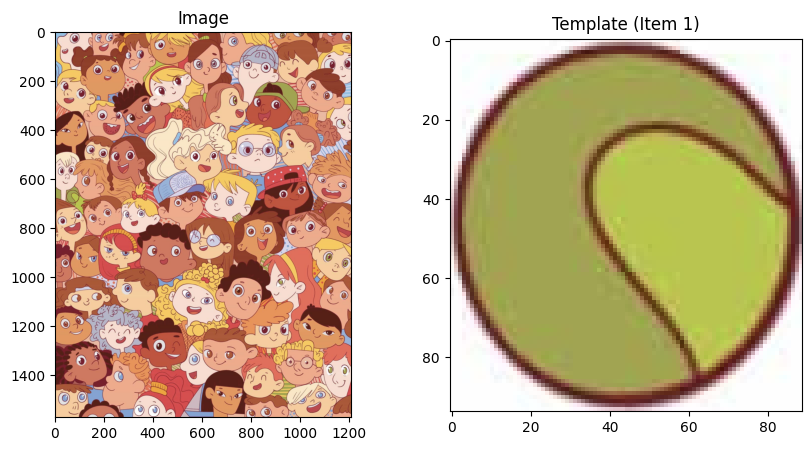

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

image_path = "/Users/phulocnguyen/Documents/Workspace/ImageProcessing/Finding_1/image.png"
template_path = "/Users/phulocnguyen/Documents/Workspace/ImageProcessing/Finding_1/items/item_1.png"

image = cv2.imread(image_path)
template = cv2.imread(template_path)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Image")
axes[1].imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
axes[1].set_title("Template (Item 1)")
plt.show()


In [3]:
import cv2
import numpy as np
from collections import Counter

template_path = "/Users/phulocnguyen/Documents/Workspace/ImageProcessing/Finding_1/items/item_1.png"
template = cv2.imread(template_path)

template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

pixels = template_rgb.reshape(-1, 3)


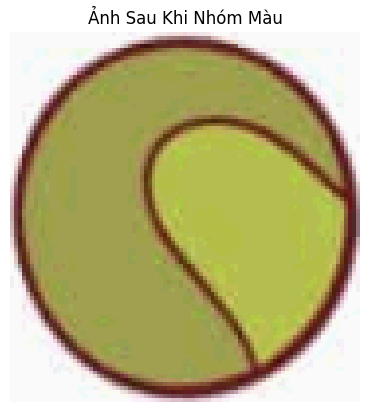

In [4]:
def bin_color(color, bin_size=10):
    return tuple((c // bin_size) * bin_size for c in color)

binned_pixels = [bin_color(pixel) for pixel in pixels]

binned_template = np.array(binned_pixels).reshape(template_rgb.shape)

plt.imshow(binned_template)
plt.title("Ảnh Sau Khi Nhóm Màu")
plt.axis("off")
plt.show()


In [5]:
color_counts = Counter(binned_pixels)
filtered_color_counts = {color: count for color, count in color_counts.items() if color != (250, 250, 250)}


most_common_colors = sorted(filtered_color_counts.items(), key=lambda x: x[1], reverse=True)[:2]

print("Top 2 most common colors:", most_common_colors)


Top 2 most common colors: [((160, 160, 80), 1833), ((180, 190, 80), 999)]


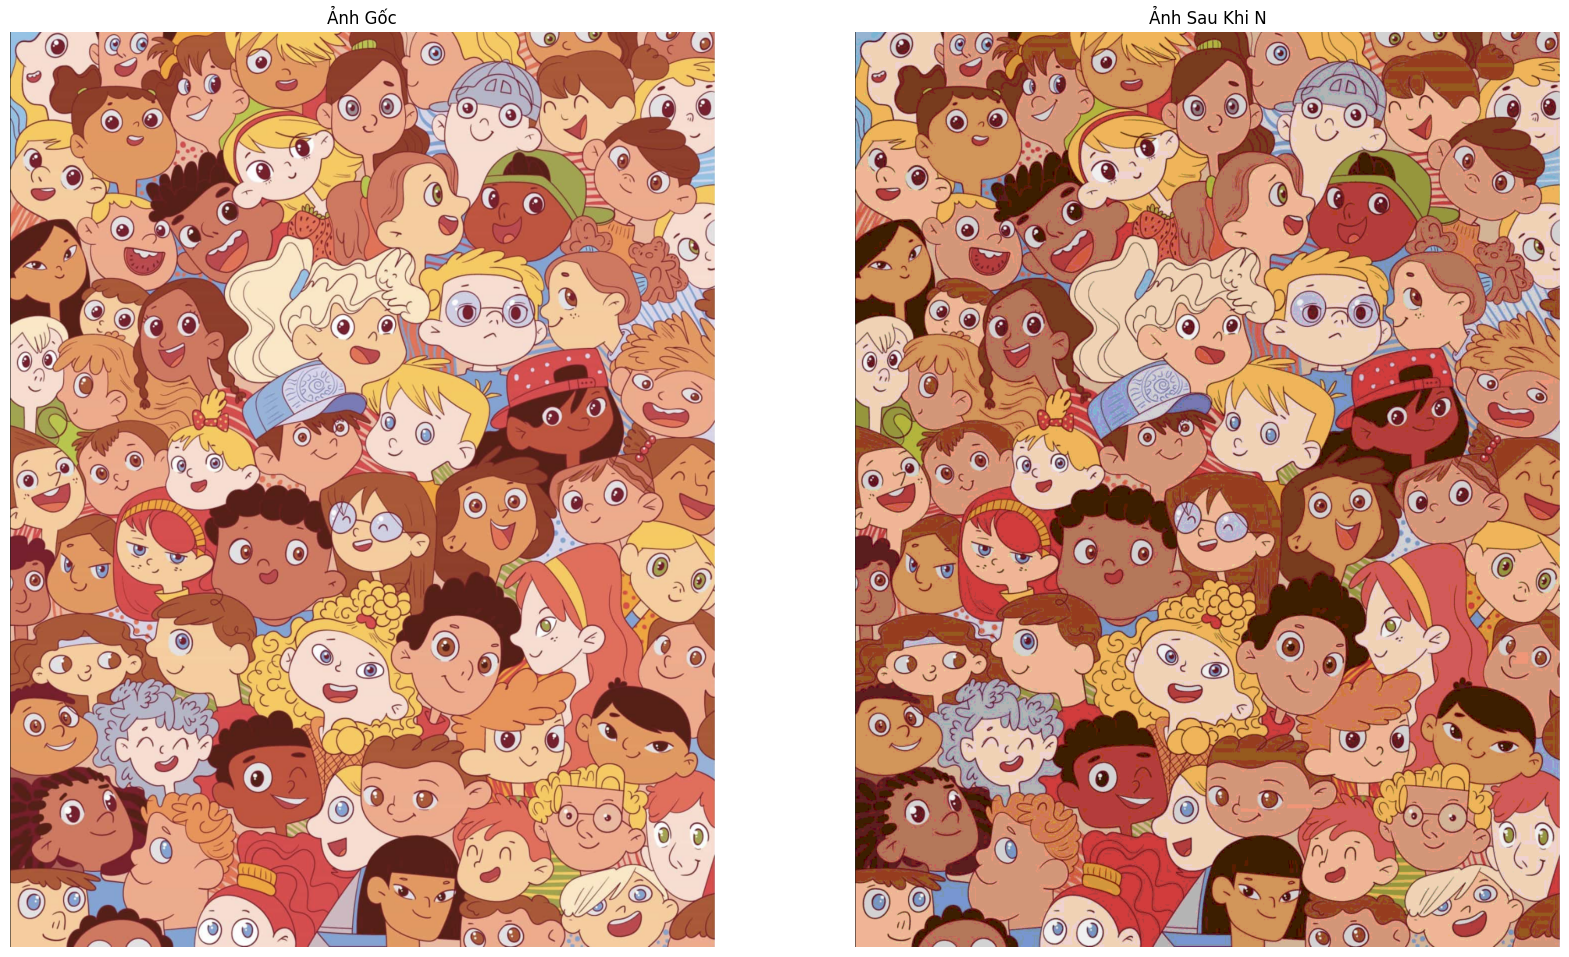

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "/Users/phulocnguyen/Documents/Workspace/ImageProcessing/Finding_1/image.png"  
image = cv2.imread(image_path)


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def bin_color(color, bin_size=30):
    return tuple((c // bin_size) * bin_size for c in color)

image_pixels = image_rgb.reshape(-1, 3)

binned_image_pixels = [bin_color(pixel) for pixel in image_pixels]

binned_image = np.array(binned_image_pixels).reshape(image_rgb.shape)

plt.figure(figsize=(20, 15))

plt.subplot(1, 2, 1)
plt.title("Ảnh Gốc")
plt.imshow(image_rgb)
plt.axis("off")


plt.subplot(1, 2, 2)
plt.title("Ảnh Sau Khi N")
plt.imshow(binned_image)
plt.axis("off")

plt.show()

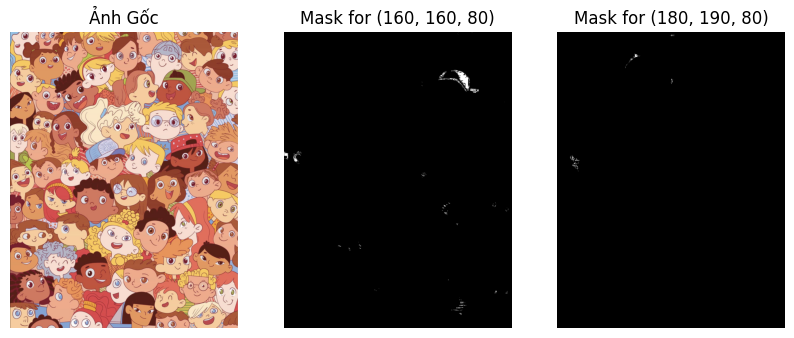

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

image_path = "image.png" 
image = cv2.imread(image_path)


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def bin_color(color, bin_size=30):
    return tuple((c // bin_size) * bin_size for c in color)

def create_color_mask(image, target_color, bin_size=30):
    image_pixels = image.reshape(-1, 3)
    
    binned_image_pixels = [bin_color(pixel, bin_size) for pixel in image_pixels]
    
    target_color_binned = bin_color(target_color, bin_size)
    mask = np.array([1 if pixel == target_color_binned else 0 for pixel in binned_image_pixels])
    
    mask_image = mask.reshape(image.shape[:2])
    return mask_image

most_common_colors = [(160, 160, 80), (180, 190, 80)]

masks = [create_color_mask(image_rgb, color, bin_size=10) for color in most_common_colors]

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Ảnh Gốc")
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title(f"Mask for {most_common_colors[0]}")
plt.imshow(masks[0], cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title(f"Mask for {most_common_colors[1]}")
plt.imshow(masks[1], cmap='gray')
plt.axis("off")


plt.show()


Most common color template: [(210, 90, 60), (210, 90, 90)]


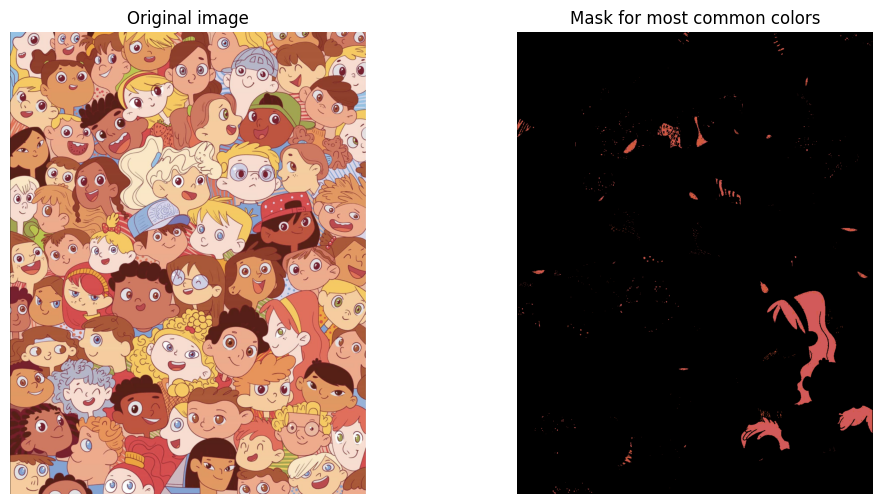

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/Users/phulocnguyen/Documents/Workspace/ImageProcessing/Finding_1/image.png"  
template_path = "/Users/phulocnguyen/Documents/Workspace/ImageProcessing/Finding_1/items/item_3.png" 
image = cv2.imread(image_path)
template = cv2.imread(template_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

def bin_color(color, bin_size=30):
    return tuple((c // bin_size) * bin_size for c in color)

template_pixels = template_rgb.reshape(-1, 3)
binned_template_pixels = [bin_color(pixel) for pixel in template_pixels]

from collections import Counter
color_counts = Counter(binned_template_pixels)

most_common_colors = [color for color, count in color_counts.most_common(3) if color != (240, 240, 240)]
print("Most common color template:", most_common_colors)

image_pixels = image_rgb.reshape(-1, 3)
binned_image_pixels = [bin_color(pixel) for pixel in image_pixels]

masks = np.zeros(image_rgb.shape, dtype=np.uint8)

for color in most_common_colors:
    mask = np.array([1 if bin_color(pixel) == color else 0 for pixel in image_pixels], dtype=np.uint8)
    mask = mask.reshape(image_rgb.shape[:2])  
    masks[mask == 1] = color  

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(masks)
plt.title("Mask for most common colors")
plt.axis("off")

plt.show()


Most common color template: [(180, 180, 180), (120, 150, 180), (120, 150, 210)]


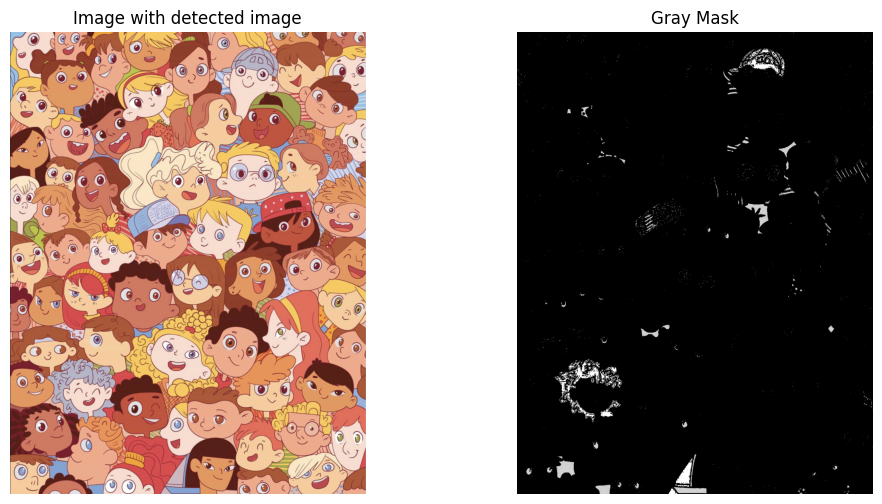

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "/Users/phulocnguyen/Documents/Workspace/ImageProcessing/Finding_1/image.png"  
template_path = "/Users/phulocnguyen/Documents/Workspace/ImageProcessing/Finding_1/items/item_15.png"  
image = cv2.imread(image_path)
template = cv2.imread(template_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)


def bin_color(color, bin_size=30):
    return tuple((c // bin_size) * bin_size for c in color)

template_pixels = template_rgb.reshape(-1, 3)
binned_template_pixels = [bin_color(pixel) for pixel in template_pixels]

from collections import Counter
color_counts = Counter(binned_template_pixels)

most_common_colors = [color for color, count in color_counts.most_common(4) if color != (240, 240, 240)]
print("Most common color template:", most_common_colors)

image_pixels = image_rgb.reshape(-1, 3)
binned_image_pixels = [bin_color(pixel) for pixel in image_pixels]

masks = np.zeros(image_rgb.shape, dtype=np.uint8)

for color in most_common_colors:

    mask = np.array([1 if bin_color(pixel) == color else 0 for pixel in image_pixels], dtype=np.uint8)
    mask = mask.reshape(image_rgb.shape[:2]) 
    masks[mask == 1] = color  

mask_gray = cv2.cvtColor(masks, cv2.COLOR_RGB2GRAY)


res = cv2.matchTemplate(mask_gray, template_gray, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
h, w = template_gray.shape
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Image with detected image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask_gray, cmap='gray')
plt.title("Gray Mask")
plt.axis("off")

plt.show()


Object's most common colors: [(180, 120, 90), (180, 90, 90), (210, 120, 90), (120, 30, 30)]


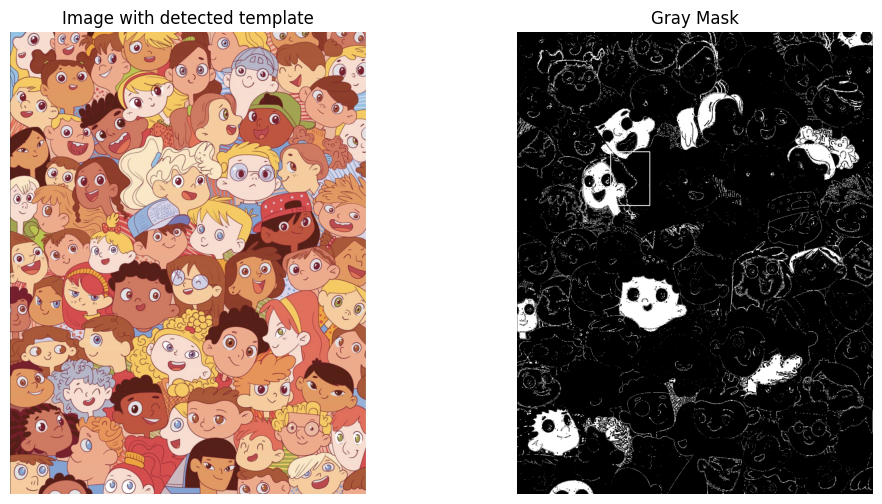

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "image.png"  
template_path = "items/item_8.png"  
image = cv2.imread(image_path)
template = cv2.imread(template_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

def bin_color(color, bin_size=30):
    return tuple((c // bin_size) * bin_size for c in color)

template_pixels = template_rgb.reshape(-1, 3)
binned_template_pixels = [bin_color(pixel) for pixel in template_pixels]

from collections import Counter
color_counts = Counter(binned_template_pixels)

most_common_colors = [color for color, count in color_counts.most_common(5) if color != (240, 240, 240)]
print("Object's most common colors:", most_common_colors)

image_pixels = image_rgb.reshape(-1, 3)
binned_image_pixels = [bin_color(pixel) for pixel in image_pixels]

masks = np.zeros(image_rgb.shape, dtype=np.uint8)

for color in most_common_colors:
    mask = np.array([1 if bin_color(pixel) == color else 0 for pixel in image_pixels], dtype=np.uint8)
    mask = mask.reshape(image_rgb.shape[:2])  
    masks[mask == 1] = color 

mask_gray = np.zeros(masks.shape[:2], dtype=np.uint8) 
mask_gray[masks[:,:,0] > 0] = 255 

res = cv2.matchTemplate(mask_gray, template_gray, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
h, w = template_gray.shape
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(mask_gray, top_left, bottom_right, (255, 0, 0), 2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Image with detected template")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask_gray, cmap='gray')
plt.title("Gray Mask")
plt.axis("off")

plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
image_path = "image.png"  
template_path = "items/item_8.png"  
image = cv2.imread(image_path)
template = cv2.imread(template_path)
print(template.shape)
print(image.shape)


image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

(183, 133, 3)
(1572, 1210, 3)


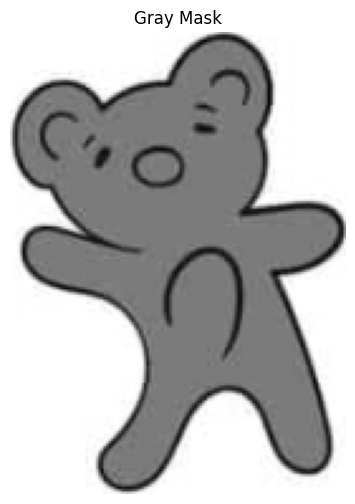

In [12]:
plt.figure(figsize=(12, 6))

plt.imshow(template_gray, cmap='gray')
plt.title("Gray Mask")
plt.axis("off")

plt.show()

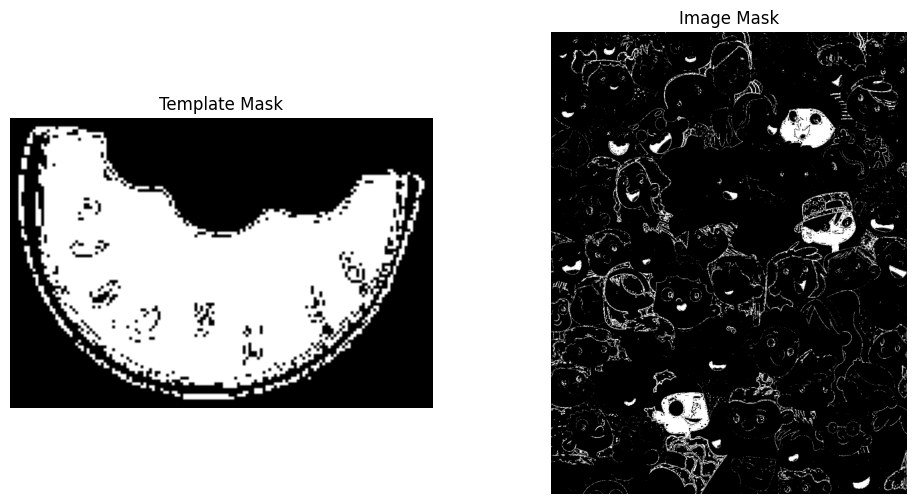

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def bin_color(color, bin_size=30):
    return tuple((c // bin_size) * bin_size for c in color)

image_path = "image.png"  
template_path = "items/item_9.png"  

image = cv2.imread(image_path)
template = cv2.imread(template_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

template_pixels = template_rgb.reshape(-1, 3)
binned_template_pixels = [bin_color(pixel) for pixel in template_pixels]
color_counts = Counter(binned_template_pixels)
most_common_colors = [color for color, count in color_counts.most_common(4) if color != (240, 240, 240)]


image_pixels = image_rgb.reshape(-1, 3)
binned_image_pixels = [bin_color(pixel) for pixel in image_pixels]
mask_gray = np.zeros(image.shape[:2], dtype=np.uint8)

for color in most_common_colors:
    mask = np.array([1 if bin_color(pixel) == color else 0 for pixel in image_pixels], dtype=np.uint8)
    mask = mask.reshape(image.shape[:2])  
    mask_gray[mask == 1] = 255  

template_mask = np.zeros(template.shape[:2], dtype=np.uint8)
template_pixels = template_rgb.reshape(-1, 3)
binned_template_pixels = [bin_color(pixel) for pixel in template_pixels]

for color in most_common_colors:
    mask = np.array([1 if bin_color(pixel) == color else 0 for pixel in binned_template_pixels], dtype=np.uint8)
    mask = mask.reshape(template.shape[:2])  
    template_mask[mask == 1] = 255 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(template_mask, cmap='gray')
plt.title("Template Mask")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask_gray, cmap='gray')
plt.title("Image Mask")
plt.axis("off")

plt.show()



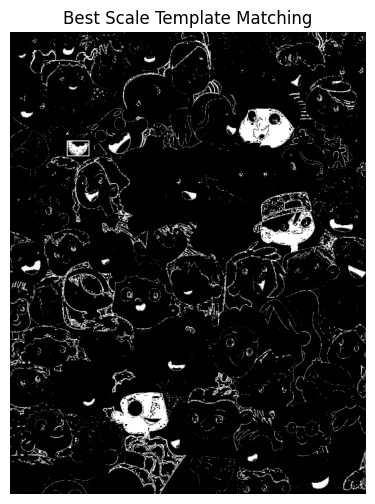

In [14]:
scales = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]  
best_match = None
best_val = -1

for scale in scales:
    resized_template = cv2.resize(template_mask, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
    
    if resized_template.shape[0] > mask_gray.shape[0] or resized_template.shape[1] > mask_gray.shape[1]:
        continue 
    
    res = cv2.matchTemplate(mask_gray, resized_template, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(res)

    if max_val > best_val:
        best_val = max_val
        best_match = (max_loc, resized_template.shape)


if best_match:
    top_left, (h, w) = best_match
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(mask_gray, top_left, bottom_right, 255, 2)

plt.figure(figsize=(6, 6))
plt.imshow(mask_gray, cmap='gray')
plt.title("Best Scale Template Matching")
plt.axis("off")
plt.show()



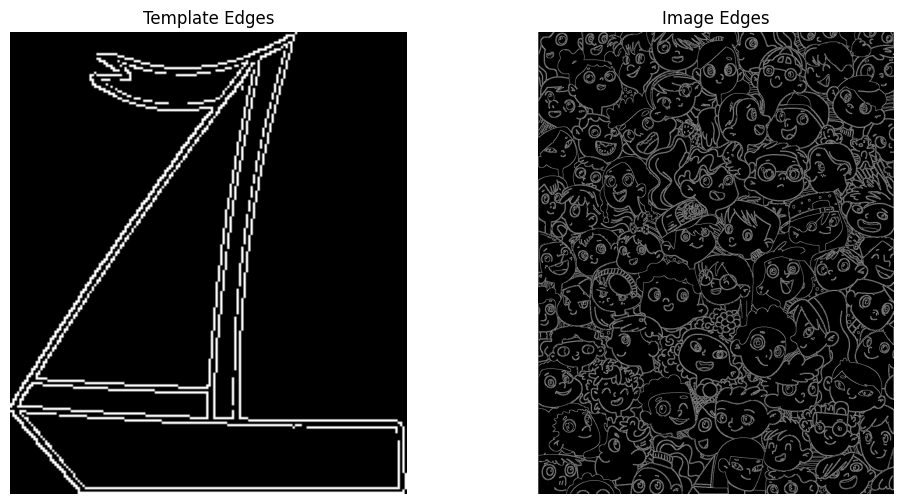

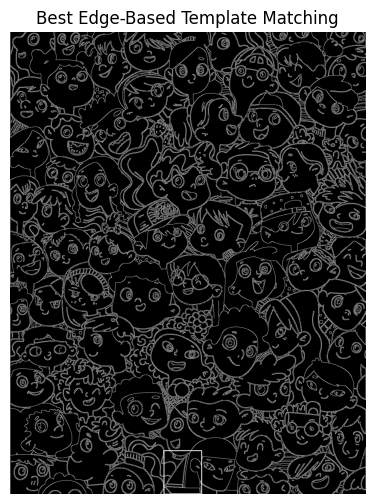

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def bin_color(color, bin_size=30):
    return tuple((c // bin_size) * bin_size for c in color)

image_path = "image.png"  
template_path = "items/item_15.png"  

image = cv2.imread(image_path)
template = cv2.imread(template_path)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Edge detection using Canny
image_edges = cv2.Canny(image_gray, 50, 150)
template_edges = cv2.Canny(template_gray, 50, 150)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(template_edges, cmap='gray')
plt.title("Template Edges")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_edges, cmap='gray')
plt.title("Image Edges")
plt.axis("off")

plt.show()


scales = [0.5, 0.75, 1.0, 1.25, 1.5] 
best_match = None
best_val = -1

for scale in scales:
    resized_template = cv2.resize(template_edges, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
    
    if resized_template.shape[0] > image_edges.shape[0] or resized_template.shape[1] > image_edges.shape[1]:
        continue 
    
    res = cv2.matchTemplate(image_edges, resized_template, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(res)

    if max_val > best_val:
        best_val = max_val
        best_match = (max_loc, resized_template.shape)


if best_match:
    top_left, (h, w) = best_match
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(image_edges, top_left, bottom_right, 255, 2)


plt.figure(figsize=(6, 6))
plt.imshow(image_edges, cmap='gray')
plt.title("Best Edge-Based Template Matching")
plt.axis("off")
plt.show()


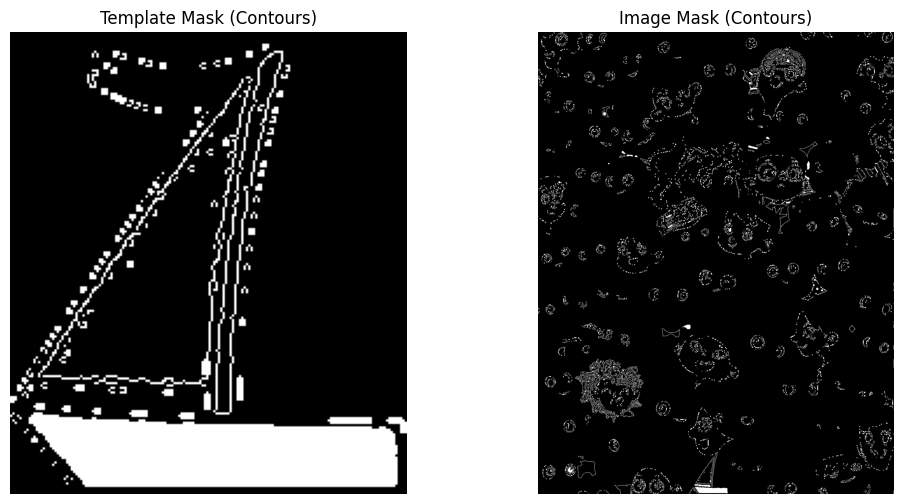

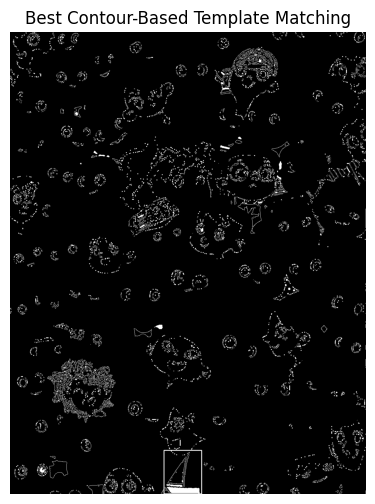

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def bin_color(color, bin_size=30):
    return tuple((c // bin_size) * bin_size for c in color)

image_path = "image.png"  
template_path = "items/item_15.png"  

image = cv2.imread(image_path)
template = cv2.imread(template_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

template_pixels = template_rgb.reshape(-1, 3)
binned_template_pixels = [bin_color(pixel) for pixel in template_pixels]
color_counts = Counter(binned_template_pixels)
most_common_colors = [color for color, count in color_counts.most_common(5) if color != (240, 240, 240)]

image_pixels = image_rgb.reshape(-1, 3)
binned_image_pixels = [bin_color(pixel) for pixel in image_pixels]

masks = np.zeros(image.shape[:2], dtype=np.uint8)
for color in most_common_colors:
    mask = np.array([1 if bin_color(pixel) == color else 0 for pixel in image_pixels], dtype=np.uint8)
    mask = mask.reshape(image.shape[:2])
    masks[mask == 1] = 255

template_masks = np.zeros(template.shape[:2], dtype=np.uint8)
for color in most_common_colors:
    mask = np.array([1 if bin_color(pixel) == color else 0 for pixel in template_pixels], dtype=np.uint8)
    mask = mask.reshape(template.shape[:2])
    template_masks[mask == 1] = 255

image_edges = cv2.Canny(masks, 50, 150)
template_edges = cv2.Canny(template_masks, 50, 150)

contours, _ = cv2.findContours(template_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
template_mask = np.zeros_like(template_edges)
cv2.drawContours(template_mask, contours, -1, 255, thickness=cv2.FILLED)

contours, _ = cv2.findContours(image_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_mask = np.zeros_like(image_edges)
cv2.drawContours(image_mask, contours, -1, 255, thickness=cv2.FILLED)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(template_mask, cmap='gray')
plt.title("Template Mask (Contours)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_mask, cmap='gray')
plt.title("Image Mask (Contours)")
plt.axis("off")

plt.show()

scales = [0.5, 0.75, 1.0, 1.25, 1.5]  
best_match = None
best_val = -1

for scale in scales:
    resized_template = cv2.resize(template_mask, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
    
    if resized_template.shape[0] > image_mask.shape[0] or resized_template.shape[1] > image_mask.shape[1]:
        continue  
    res = cv2.matchTemplate(image_mask, resized_template, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(res)

    if max_val > best_val:
        best_val = max_val
        best_match = (max_loc, resized_template.shape)

if best_match:
    top_left, (h, w) = best_match
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(image_mask, top_left, bottom_right, 255, 2)

plt.figure(figsize=(6, 6))
plt.imshow(image_mask, cmap='gray')
plt.title("Best Contour-Based Template Matching")
plt.axis("off")
plt.show()
